In [83]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [84]:
# Load the dataset
df = pd.read_csv("/content/waterQuality1.csv")

In [85]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [86]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [87]:
df.shape


(7999, 21)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [89]:
# Check for missing values
missing_value = ['#NUM!', np.nan]
df=pd.read_csv("/content/waterQuality1.csv", na_values = missing_value)
df.isnull().sum()

,0
aluminium,0
ammonia,3
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [90]:
df.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [91]:
# Check the data types of each column
df.dtypes

,0
aluminium,float64
ammonia,float64
arsenic,float64
barium,float64
cadmium,float64
chloramine,float64
chromium,float64
copper,float64
flouride,float64
bacteria,float64


In [92]:
# Separate the majority and minority classes
majority_class = df[df['is_safe'] == 0]
minority_class = df[df['is_safe'] == 1]

In [93]:
# Randomly sample the majority class to match the number of samples in the minority class
undersampled_majority = majority_class.sample(len(minority_class), random_state=42)

In [94]:
# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

In [95]:
# Shuffle the dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

In [96]:
# Separate the features (X) and target variable (y)
X = undersampled_df.drop('is_safe', axis=1)
y = undersampled_df['is_safe']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

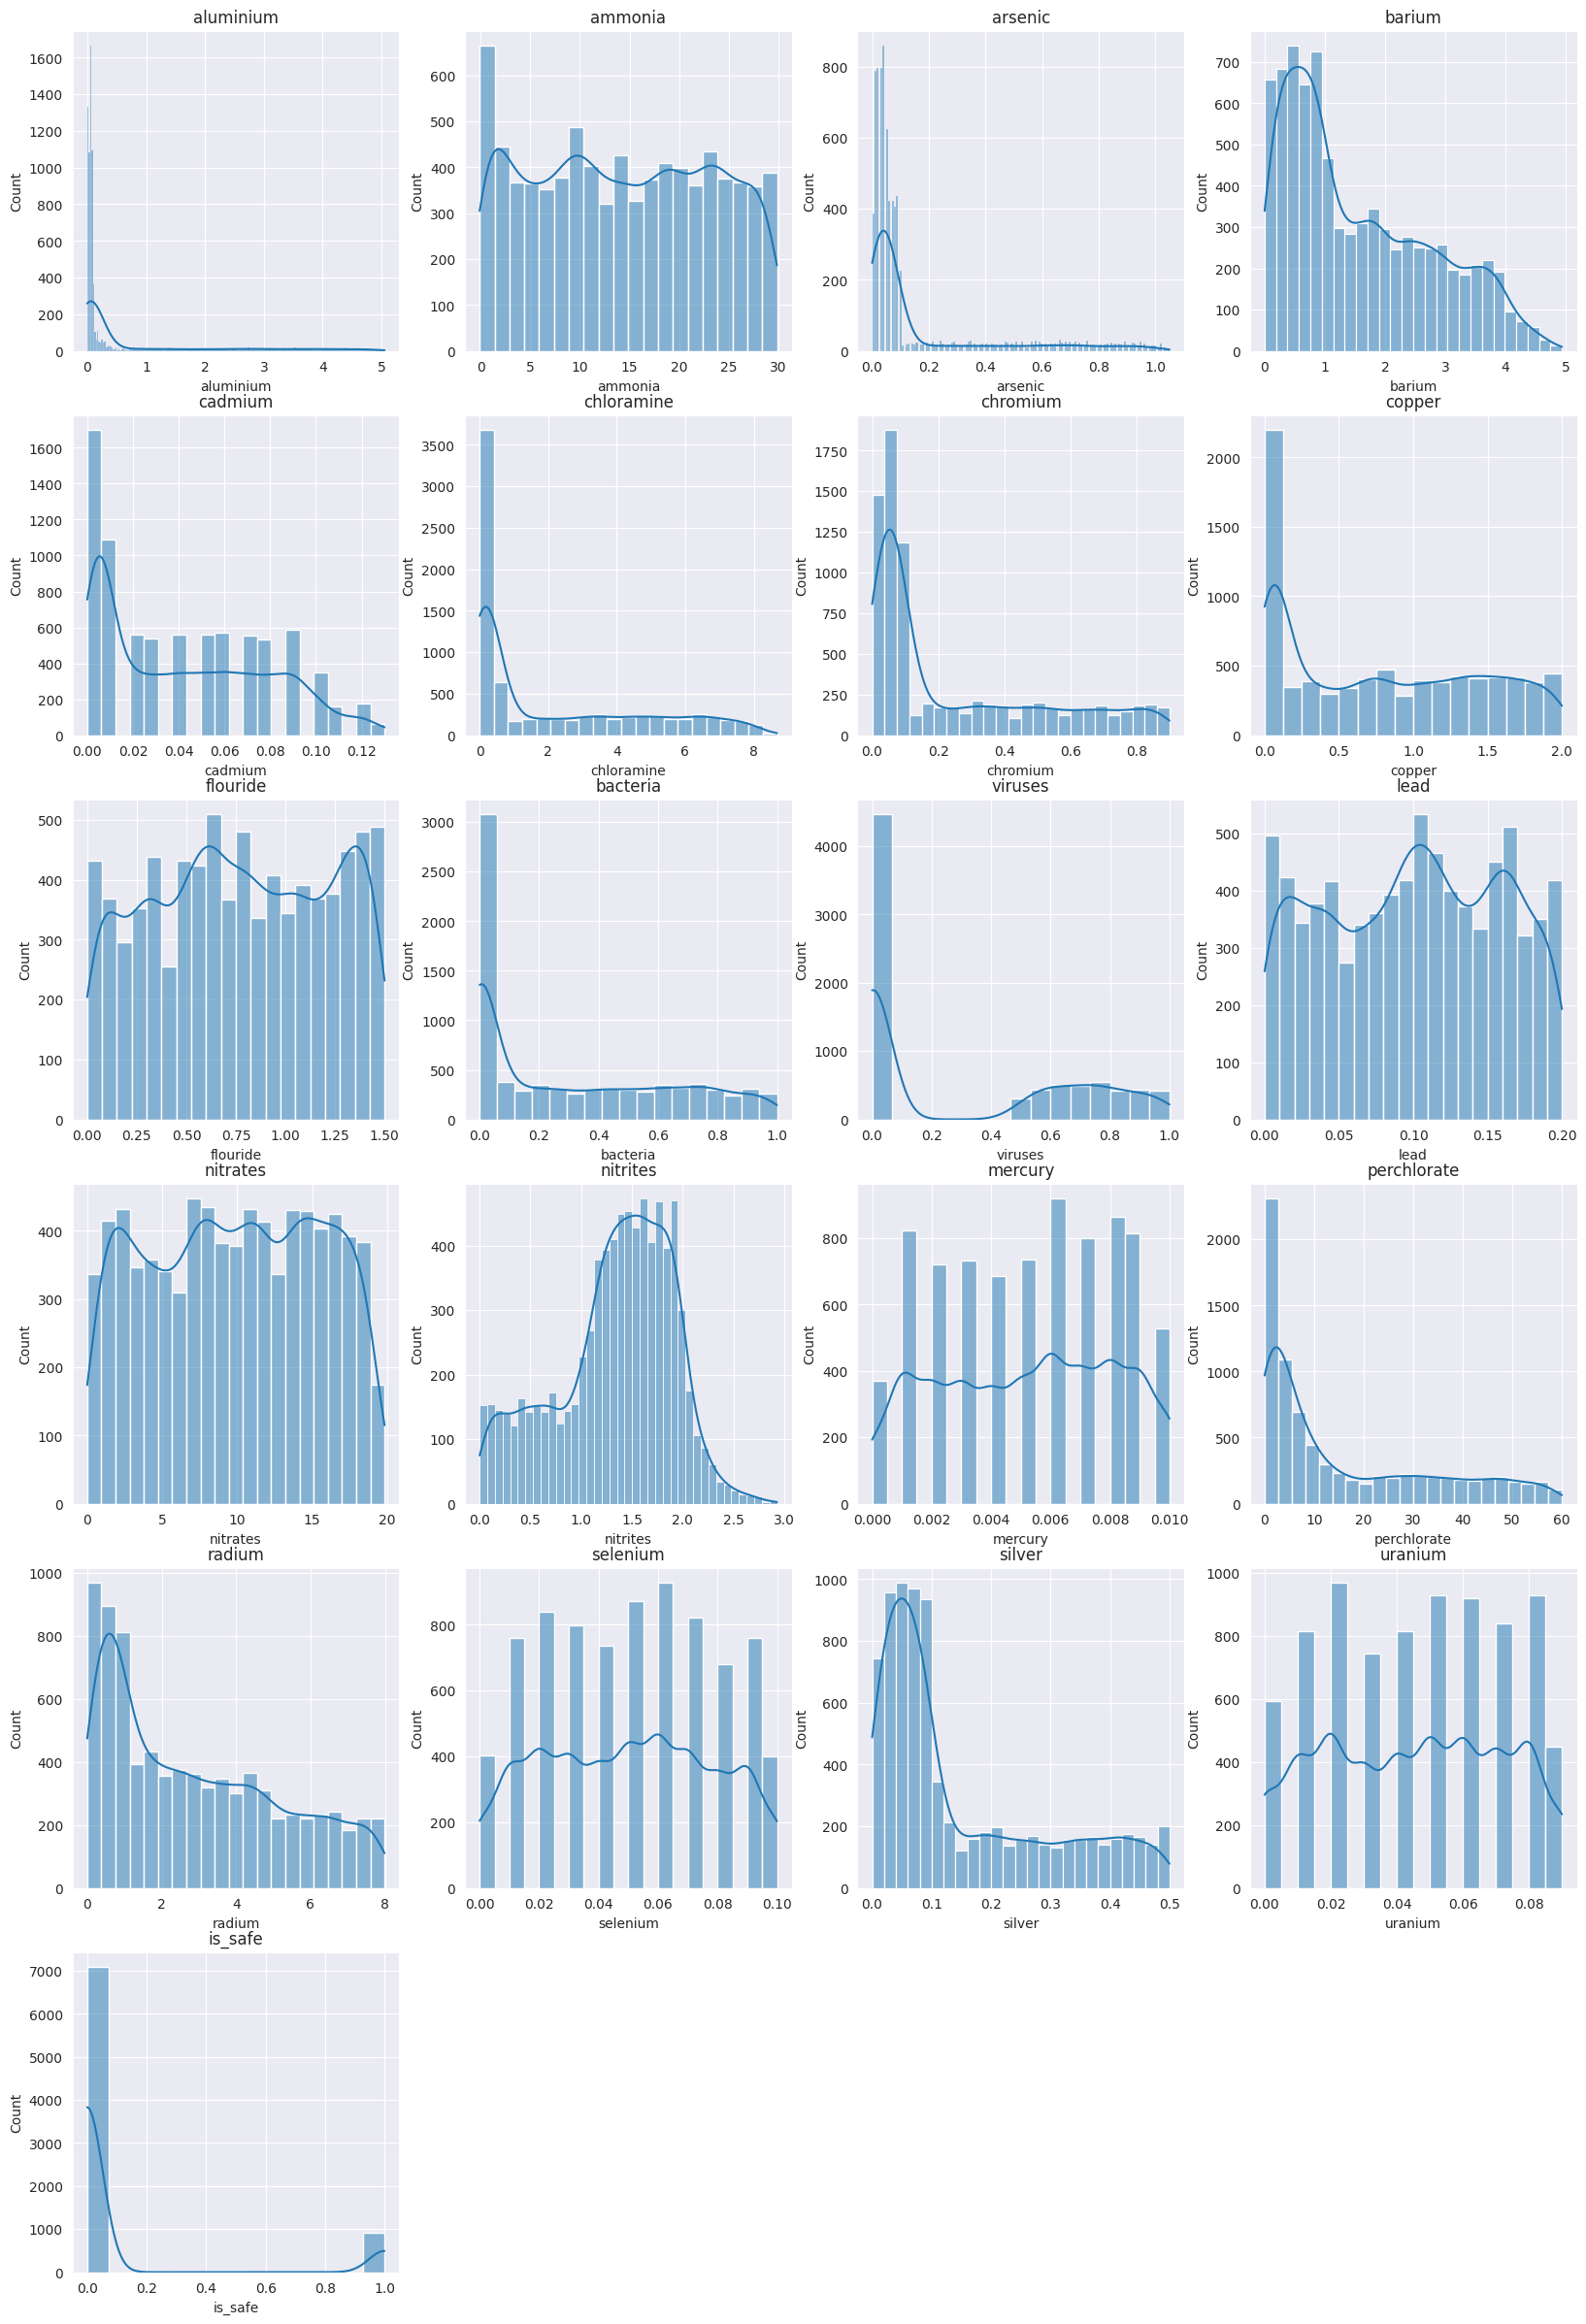

In [98]:
# Visualize the distribution of each column
num_cols = len(df.columns)
num_rows = int(num_cols / 4) + (num_cols % 4 > 0)
plt.figure(figsize=(20, num_rows * 5))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

In [99]:
# Check for correlation between columns
corr = df.corr()

<Axes: >

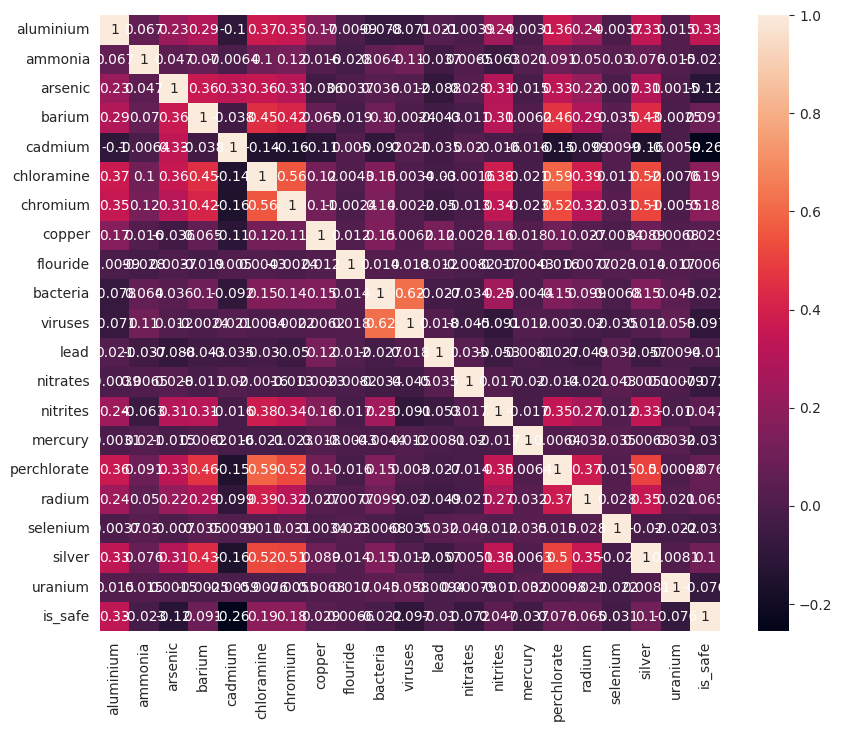

In [100]:
# Visualize the correlation between columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

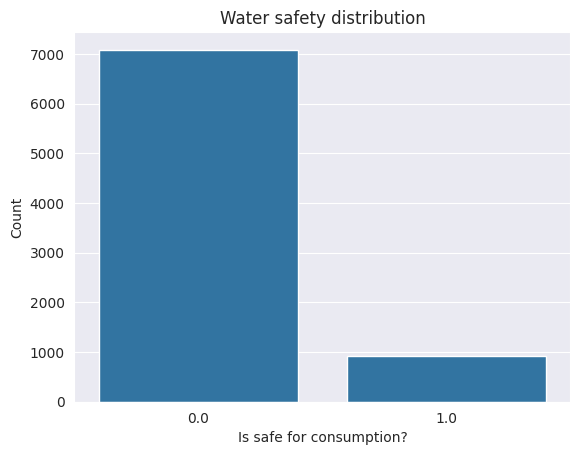

In [101]:
sns.set_style('darkgrid')
sns.countplot(x='is_safe', data=df)
plt.title('Water safety distribution')
plt.xlabel('Is safe for consumption?')
plt.ylabel('Count')
plt.show()

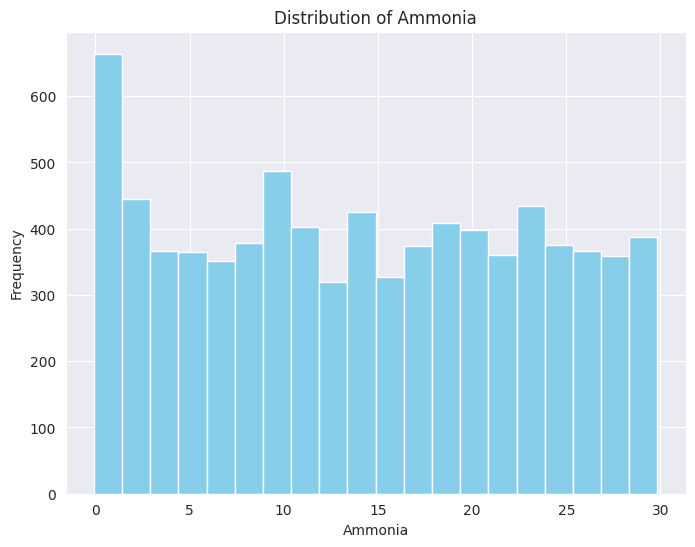

In [102]:
#the distribution of the "ammonia" values in the dataset
plt.figure(figsize=(8, 6))
plt.hist(df["ammonia"], bins=20, color="skyblue")
plt.xlabel("Ammonia")
plt.ylabel("Frequency")
plt.title("Distribution of Ammonia")
plt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate the accuracy
RF = accuracy_score(y_test, y_pred)
print("Accuracy:",RF)

Accuracy: 0.9342465753424658


In [105]:
# Print classification report
rf_cr = classification_report(y_test,y_pred)
print("Random Forest Classification Report:")
print(rf_cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       179
         1.0       0.94      0.94      0.94       186

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



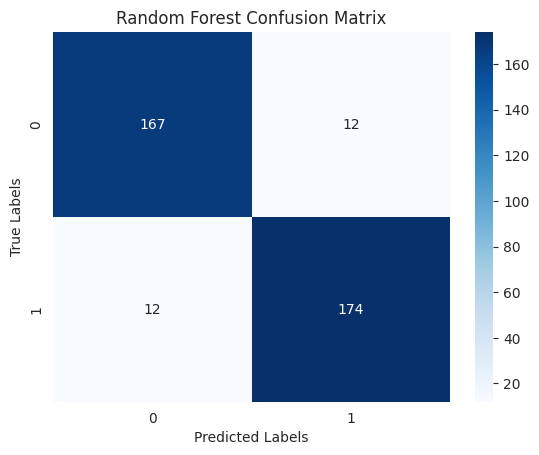

In [106]:
# Plot confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [107]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [108]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8931506849315068


In [109]:
# Print classification report
dt_cr = classification_report(y_test,y_pred)
print(" DecisionTree Classification Report:")
print(dt_cr)

 DecisionTree Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       179
         1.0       0.93      0.85      0.89       186

    accuracy                           0.89       365
   macro avg       0.90      0.89      0.89       365
weighted avg       0.90      0.89      0.89       365



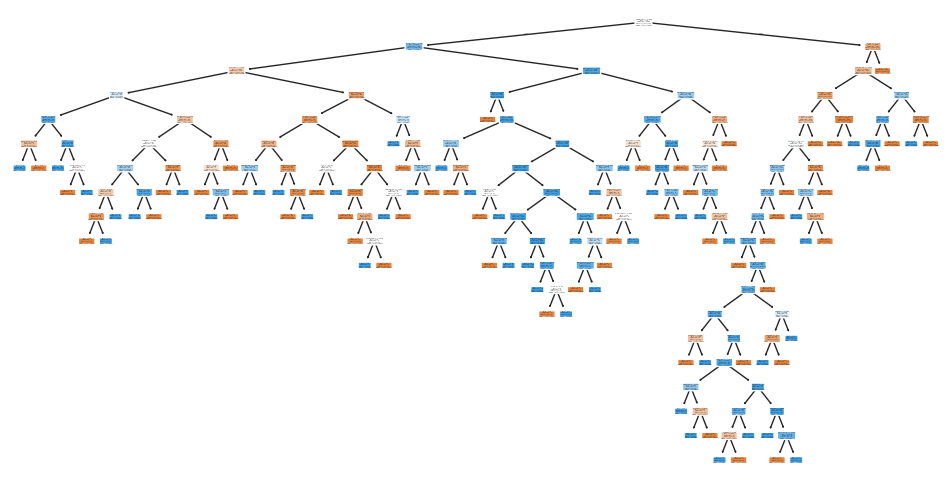

In [110]:
# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dt_classifier, filled=True, rounded=True, class_names=["Not Potable", "Potable"], feature_names=X.columns)
plt.show()


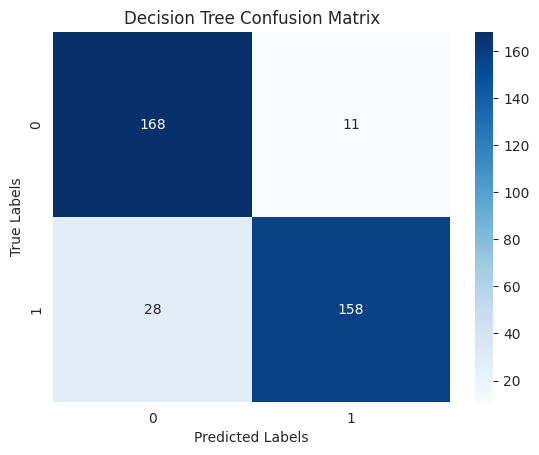

In [111]:
# Plot confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [112]:
from sklearn.svm import SVC
# Create SVM classifier
svm = SVC()
# Fit the model
svm.fit(X_train, y_train)

SVC()

In [113]:
# Make predictions
svm_predictions = svm.predict(X_test)
# Calculate accuracy
SVM = accuracy_score(y_test, svm_predictions)
print("Accuracy:",SVM)

Accuracy: 0.7780821917808219


In [114]:
# Print classification report
svm_cr = classification_report(y_test,y_pred)
print(" SVM Classification Report:")
print(svm_cr)

 SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       179
         1.0       0.93      0.85      0.89       186

    accuracy                           0.89       365
   macro avg       0.90      0.89      0.89       365
weighted avg       0.90      0.89      0.89       365



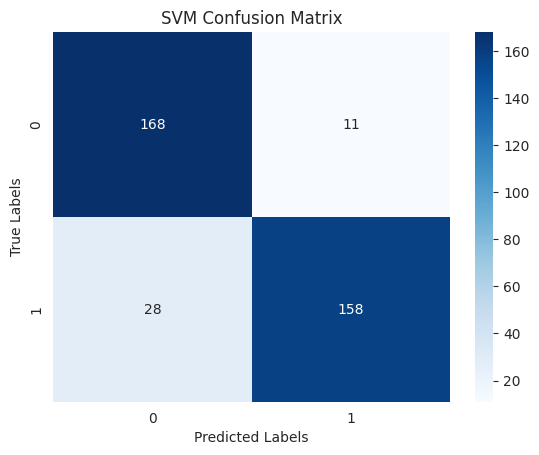

In [115]:
# Generate confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression
# Create and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [117]:
# Make predictions on the test set
logreg_predictions = logreg.predict(X_test)
# Compute accuracy
lre = accuracy_score(y_test, logreg_predictions)
print("Accuracy:",lre)

Accuracy: 0.7753424657534247


In [118]:
# Compute classification report
report = classification_report(y_test, logreg_predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       179
         1.0       0.82      0.72      0.77       186

    accuracy                           0.78       365
   macro avg       0.78      0.78      0.77       365
weighted avg       0.78      0.78      0.77       365



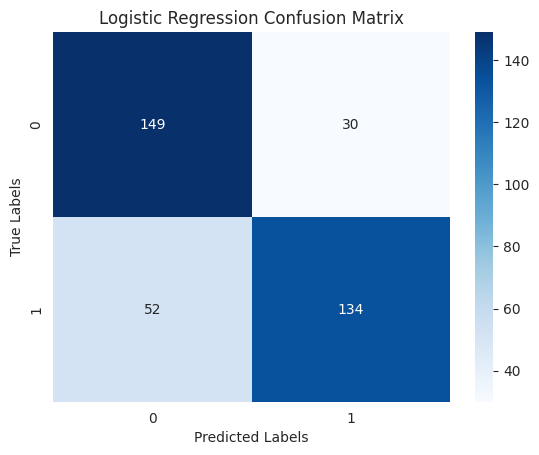

In [119]:
# Compute confusion matrix
cm = confusion_matrix(y_test, logreg_predictions)
# Visualize confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
# Compute accuracy
knc = accuracy_score(y_test, y_pred)
print("Accuracy:",knc)

Accuracy: 0.6958904109589041


In [122]:
# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       179
         1.0       0.71      0.67      0.69       186

    accuracy                           0.70       365
   macro avg       0.70      0.70      0.70       365
weighted avg       0.70      0.70      0.70       365



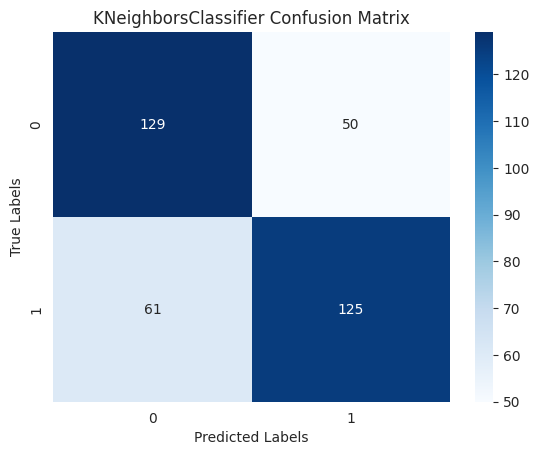

In [123]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.title("KNeighborsClassifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [124]:
from sklearn.ensemble import AdaBoostClassifier
# Create and fit the AdaBoost classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)


AdaBoostClassifier()

In [125]:
# Make predictions
y_pred = ada_classifier.predict(X_test)
# Calculate accuracy
adbo = accuracy_score(y_test, y_pred)
print("Accuracy:",adbo)

Accuracy: 0.852054794520548


In [126]:
# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       179
         1.0       0.85      0.85      0.85       186

    accuracy                           0.85       365
   macro avg       0.85      0.85      0.85       365
weighted avg       0.85      0.85      0.85       365



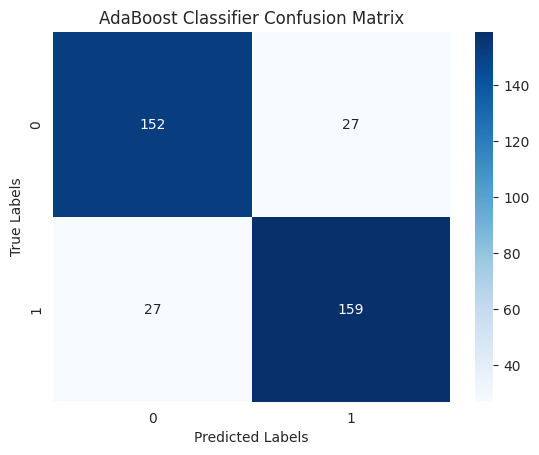

In [127]:
# Generate confusion matrix
abc = confusion_matrix(y_test, y_pred)
# Visualize confusion matrix
sns.heatmap(abc, annot=True, cmap="Blues",fmt="d")
plt.title("AdaBoost Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
# Create and fit the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [129]:
# Make predictions
y_pred = gb_classifier.predict(X_test)
# Calculate accuracy
grbo = accuracy_score(y_test, y_pred)
print("Accuracy:", grbo)

Accuracy: 0.9287671232876712


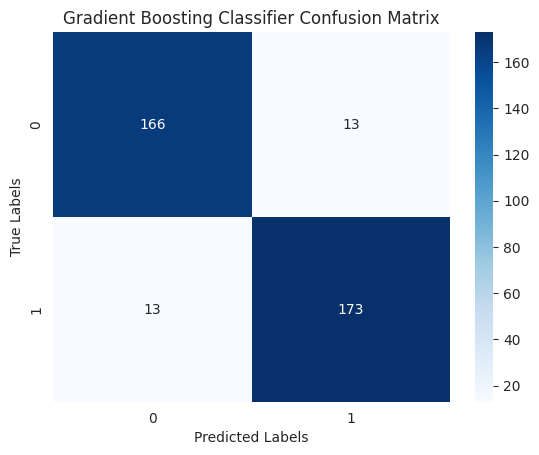

In [130]:
# Generate confusion matrix
gcm = confusion_matrix(y_test, y_pred)
# Generate confusion matrix
gcm = confusion_matrix(y_test, y_pred)
# Visualize confusion matrix
sns.heatmap(gcm, annot=True, cmap="Blues",fmt="d")
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [131]:
from sklearn.naive_bayes import GaussianNB
# Create and fit the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [132]:
# Make predictions
y_pred = classifier.predict(X_test)
# Calculate accuracy
naba = accuracy_score(y_test, y_pred)
print("Accuracy:", naba)

Accuracy: 0.7835616438356164


In [133]:
# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       179
         1.0       0.80      0.77      0.78       186

    accuracy                           0.78       365
   macro avg       0.78      0.78      0.78       365
weighted avg       0.78      0.78      0.78       365



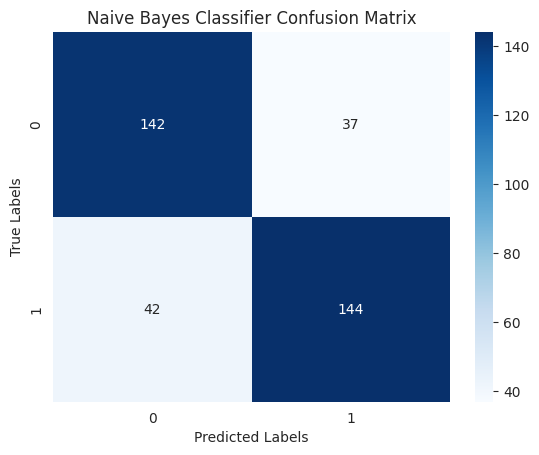

In [134]:
# Generate confusion matrix
nb = confusion_matrix(y_test, y_pred)
# Visualize confusion matrix
sns.heatmap(nb, annot=True, cmap="Blues",fmt="d")
plt.title("Naive Bayes Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

,Model,Accuracy_score
0,Random Forest,0.934247
6,Gradient Boost,0.928767
1,Decision Tree,0.893151
5,AdaBoost,0.852055
7,Naive Bayes,0.783562
2,SVM,0.778082
3,Logistic Regression,0.775342
4,KNeighbours,0.695890


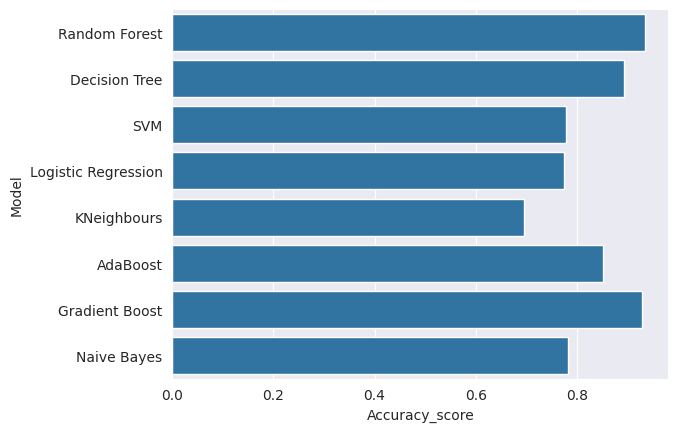

In [135]:
models = pd.DataFrame({
    'Model':[ 'Random Forest','Decision Tree','SVM','Logistic Regression','KNeighbours', 'AdaBoost','Gradient Boost','Naive Bayes'],
    'Accuracy_score' :[ RF,accuracy,SVM,lre, knc, adbo,grbo,naba]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)